In [1]:
import numpy as np
import matplotlib.pyplot as plt

from defects import *
import sys
import os
print(os.getcwd())

sys.path.insert(1, os.path.dirname(os.getcwd()))

c:\Users\victo\nematics\nematics\vasco_scripts


## Check for experimental example

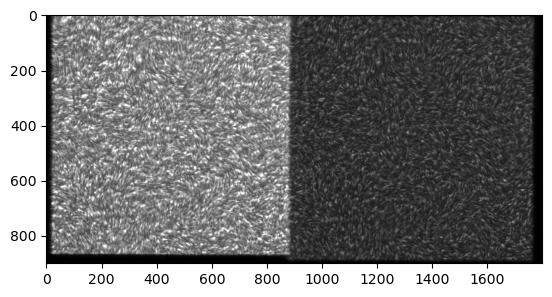

In [4]:
# data_path = r'C:\Users\USER'
# plot_path = r'D:\Scientific_data\Plots'

# # file = r'\4.jpg'
# file = r"\CODES\nematics\example_images\raw\1_X1.tif"
# file = r"\Downloads\BEER\pep 858\1-20\1-0001.tif"

# img = plt.imread(data_path + file)#[:,:900]
# file = r"..\example_images\raw\1_X1.tif"
# file = r"\Downloads\BEER\pep 858\1-20\1-0001.tif"
# file = r"..\_bacteria\hbec_images\raw\Trans__281.tif"
file = r"E:\BEER\March 1st 100fps 40X 50-50 1um gap\1_X1.tif"
# C:\Users\victo\nematics\nematics\example_images
# C:\Users\victo\nematics\nematics\_bacteria\hbec_images\raw

# TODO works only for reqtangular images.
img = plt.imread(file)[:,:]
# img = img[-np.min(img.shape):,-np.min(img.shape):]
plt.imshow(img, cmap="gray")

## Giomi

In [9]:
ori, coh, E = orientation_analysis(img, 15)
import cv2
cv2.imwrite(r"C:\Users\victo\OneDrive - BGU\Desktop\test_ori.tif" ,ori)

True

In [5]:
# Due to the choice of the 2x2 grid (neigbors in the northeastern corner), 
# we move the detected defect to the middle of the cell
shift = 1/2 
pix_x = img.shape[1]
pix_y = img.shape[0]

x = np.arange(0,pix_x)
y = np.arange(0,pix_y)

xx, yy = np.meshgrid(x, y)

ori, coh, E = orientation_analysis(img, 25)
k = compute_topological_charges(ori, int_area='cell', origin='upper')
defects = localize_defects(k, x_grid=xx, y_grid=yy)
compute_defect_orientations(ori, defects)
plushalf = defects[defects['charge']==.5]
minushalf = defects[defects['charge']==-.5]
fig, ax  = plt.subplots(figsize=(16,16))
s = 15
ax.imshow(img, cmap='gray')
ax.quiver(xx[::s,::s], yy[::s,::s], 
    np.cos(ori)[::s,::s], np.sin(ori)[::s,::s], 
    headaxislength=0, headwidth=0, headlength=0, 
    color='lawngreen', scale=60, pivot='mid', alpha=.5)

ax.plot(plushalf['x'], plushalf['y'],'ro',markersize=10,label=r'+1/2 defect')
ax.quiver(plushalf['x'], plushalf['y'], 
    np.cos(plushalf['ang1']), np.sin(plushalf['ang1']), 
    headaxislength=0, headwidth=0, headlength=0, color='r', scale=50)

for i in range(3):
    ax.quiver(minushalf['x'], minushalf['y'], 
        np.cos(minushalf['ang'+str(i+1)]), np.sin(minushalf['ang'+str(i+1)]), 
        headaxislength=0, headwidth=0, headlength=0, color='b', scale=50)

ax.set_xlabel('x (in pixels)')
ax.set_ylabel('y (in pixels)')

IndexError: index 1488 is out of bounds for axis 0 with size 900

### Simple
The image (and all subsequent computations) have to be flipped in order to work properly. Maybe this can be streamlined/avoided by some additional keywords??

In [26]:
ori, coh, E = orientation_analysis(img, 25)
k = compute_topological_charges(-ori, int_area='cell', origin='lower')
defects = localize_defects(k, x_grid=xx, y_grid=yy)
compute_defect_orientations(-ori, defects, method='interpolation', x_grid=x, y_grid=y, interpolation_radius=5,  min_sep=1)

In [17]:
plushalf = defects[defects['charge']==.5]
minushalf = defects[defects['charge']==-.5]

Text(0, 0.5, 'y (in pixels)')

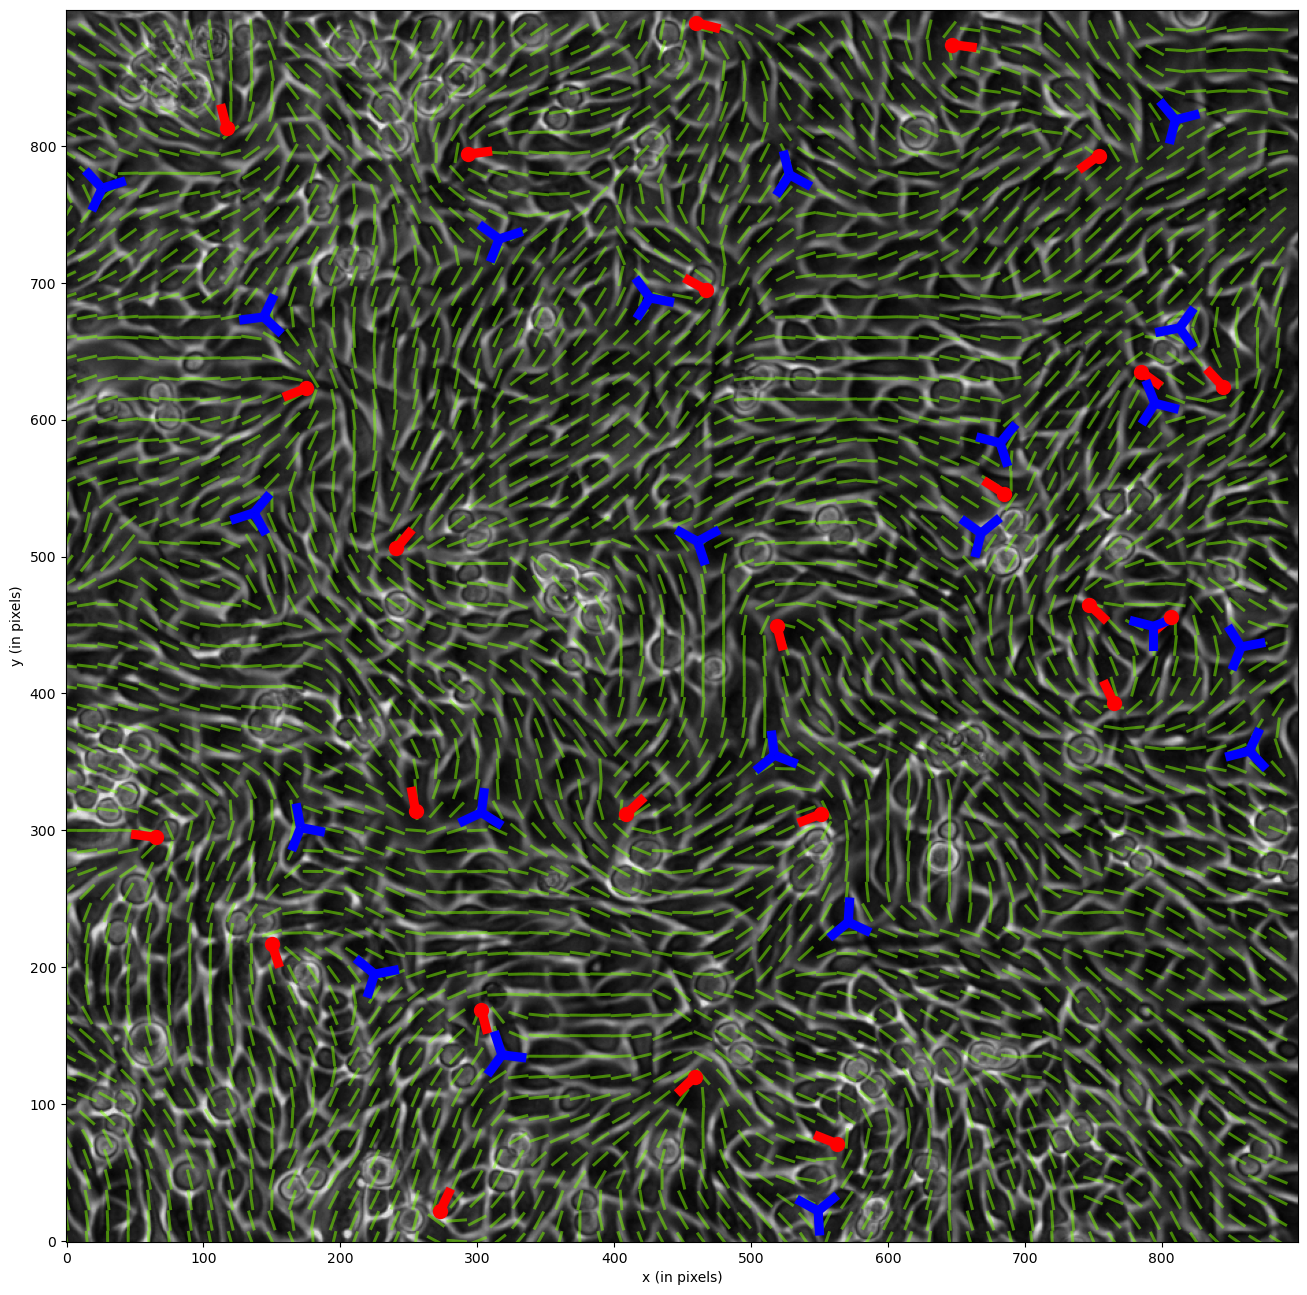

In [18]:
fig, ax  = plt.subplots(figsize=(16,16))
s = 15
ax.imshow(img, cmap='gray', origin='lower')
ax.quiver(xx[::s,::s], yy[::s,::s], 
    np.cos(ori)[::s,::s], -np.sin(ori)[::s,::s], 
    headaxislength=0, headwidth=0, headlength=0, 
    color='lawngreen', scale=60, pivot='mid', alpha=.5)

ax.plot(plushalf['x'], plushalf['y'],'ro',markersize=10,label=r'+1/2 defect')
ax.quiver(plushalf['x'], plushalf['y'], 
    np.cos(plushalf['ang1']), np.sin(plushalf['ang1']), 
    headaxislength=0, headwidth=0, headlength=0, color='r', scale=50)

for i in range(3):
    ax.quiver(minushalf['x'], minushalf['y'], 
        np.cos(minushalf['ang'+str(i+1)]), np.sin(minushalf['ang'+str(i+1)]), 
        headaxislength=0, headwidth=0, headlength=0, color='b', scale=50)

ax.set_xlabel('x (in pixels)')
ax.set_ylabel('y (in pixels)')

In [19]:
diff_1 = modulo(minushalf['ang1']-minushalf['ang2'],type='polar')
diff_2 = modulo(minushalf['ang1']-minushalf['ang3'],type='polar')
diff_3 = modulo(minushalf['ang2']-minushalf['ang3'],type='polar')
diff = np.hstack((diff_1,diff_2,diff_3))
np.rad2deg(diff)


array([-111.6, -115.2, -129.6, -111.6, -147.6,  115.2, -118.8, -111.6,
        111.6,  104.4, -100.8,  104.4, -100.8, -122.4,  126. , -136.8,
        108. , -111.6, -126. ,  115.2,   93.6, -126. ,  126. ,  118.8,
        118.8,  115.2,  111.6, -122.4,  118.8,  118.8, -126. , -111.6,
        136.8, -111.6,  147.6,  122.4, -126. ,  108. , -122.4,  136.8,
        129.6, -111.6, -133.2,  115.2, -122.4, -126. , -111.6, -133.2,
       -100.8,  122.4, -122.4, -129.6,  122.4,  144. , -122.4,  144. ,
       -111.6, -115.2,  108. , -115.2,  129.6, -111.6, -104.4,  133.2,
        133.2, -118.8])

Text(0, 0.5, 'PDF')

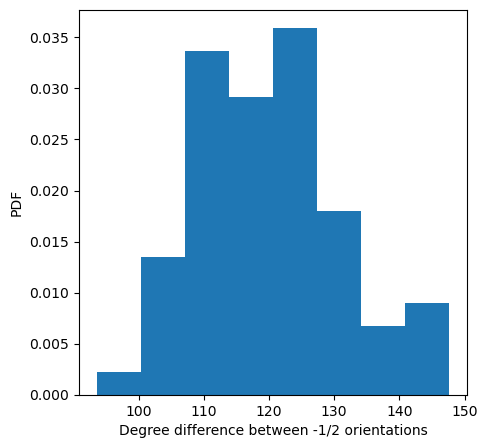

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(np.abs(np.rad2deg(diff)),bins='auto',density=True)
ax.set_xlabel('Degree difference between -1/2 orientations')
ax.set_ylabel('PDF')

In [21]:
print(np.argmin(diff_1))
print(np.argmin(diff_2))
print(np.argmin(diff_3))

4
20
3


In [22]:
print(np.rad2deg(diff_1[1]))
print(np.rad2deg(diff_2[1]))
print(np.rad2deg(diff_3[1]))

-115.19999999999999
118.80000000000004
-125.99999999999994


## Check consistency of quiver/imshow

In [25]:
data_path = r'C:\Users\USER'
plot_path = r'D:\Scientific_data\Plots'

# file = r'\4.jpg'
# file = r"\CODES\nematics\example_images\raw\1_X1.tif"
file = r"\Downloads\BEER\pep 858\1-20\1-0001.tif"


# TODO works only for reqtangular images.
img = plt.imread(data_path + file)#[:,:900]
img = img[-np.min(img.shape):,-np.min(img.shape):]

from skimage.color import rgb2gray
img = rgb2gray(img)
plt.imshow(img, cmap="gray")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\USER\\Downloads\\BEER\\pep 858\\1-20\\1-0001.tif'

In [12]:
shift = 1/2 # Due to the choice of the 2x2 grid (neigbors in the northeastern corner), we move the detected defect to the middle of the cell

pix_x = img.shape[1]
pix_y = img.shape[0]

x = np.arange(0,pix_x)
y = np.arange(0,pix_y)

xx, yy = np.meshgrid(x, y)

In [13]:
ori, coh, E = orientation_analysis(img, 15)
k = compute_topological_charges(ori, int_area='cell', origin='upper')
defects = localize_defects(k, x_grid=xx, y_grid=yy)
compute_defect_orientations(ori, defects)

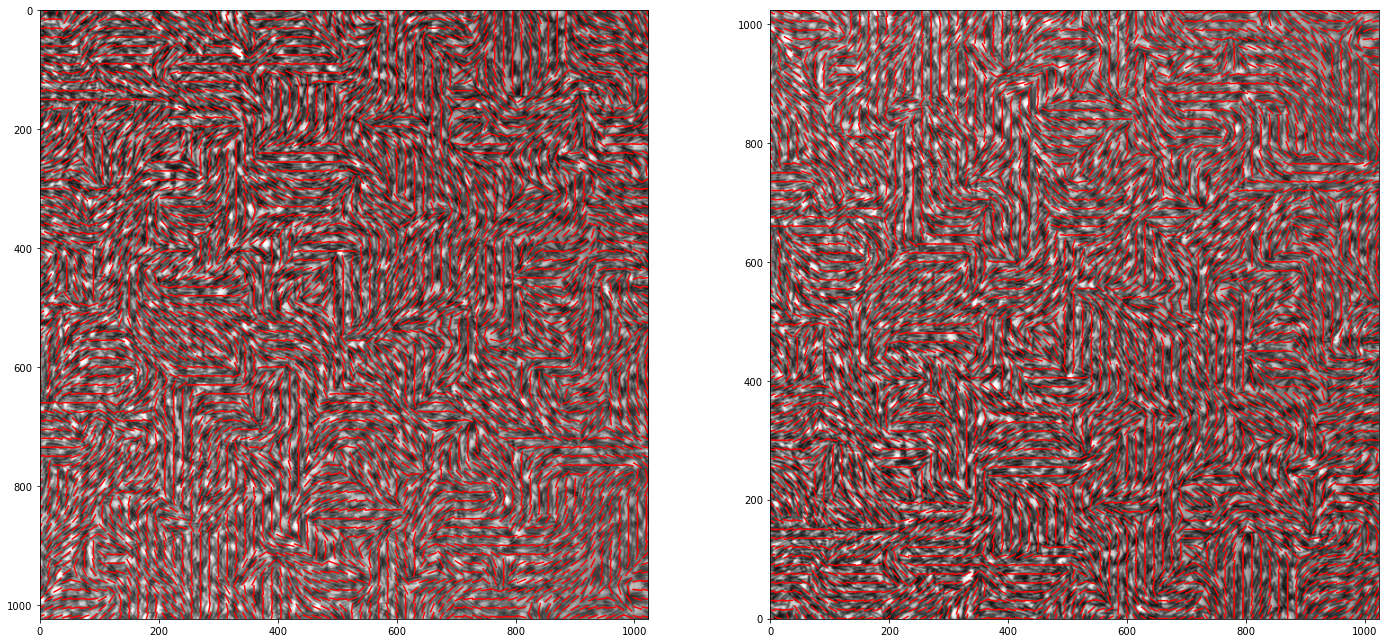

In [14]:
fig, axs  = plt.subplots(1,2,figsize=(24,12))
s = 15
axs[0].imshow(img,cmap='gray')
axs[0].quiver(xx[::s,::s], yy[::s,::s], 
    np.cos(ori)[::s,::s], np.sin(ori)[::s,::s], 
    headaxislength=0, headwidth=0, headlength=0, color='r', scale=60, pivot='mid')
axs[1].imshow(img,cmap='gray',origin='lower')
axs[1].quiver(xx[::s,::s], yy[::s,::s], 
    np.cos(-ori)[::s,::s], np.sin(-ori)[::s,::s], 
    headaxislength=0, headwidth=0, headlength=0, color='r', scale=60, pivot='mid')

## Analytical examples
Symmetric defects as minimizers of elastic energy (equal Frank constants)

0.5000000000000001
0.0
3.533949646070574e-17


c:\Users\USER\anaconda3\envs\RevDx\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=24,21 m=400 fp=0.000004 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


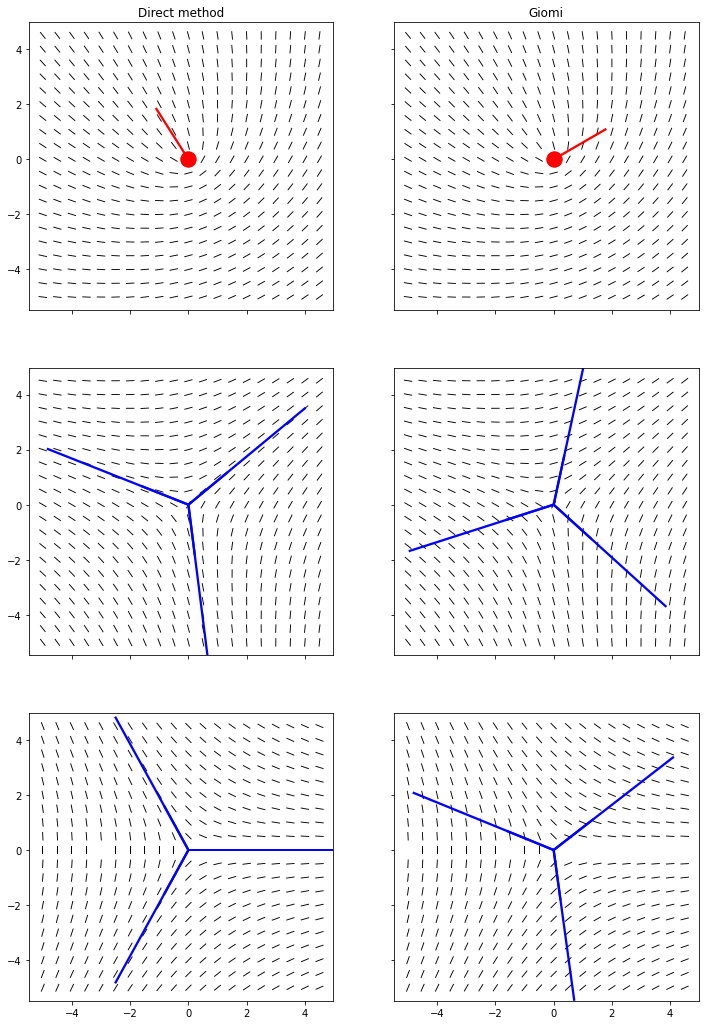

In [31]:
fig, axs = plt.subplots(3,2,figsize=(12,18),sharex=True,sharey=True)

axs[0,0].set_title('Direct method')
axs[0,1].set_title('Giomi')

charges = [1/2,-1/2,-1/2]
theta_0 = [np.pi/3,np.pi/3,0]

x = np.arange(-5,5,.5)
y = np.arange(-5,5,.5)
xx, yy = np.meshgrid(x,y)

phi = np.arctan2(yy,xx)

for i in range(len(charges)):
    theta = charges[i]*phi + theta_0[i]

    k = compute_topological_charges(theta, int_area='square', width=1, origin='lower')
    print(k.max())
    defects = localize_defects(k, x_grid=xx, y_grid=yy)
    defects['x'] = 0
    defects['y'] = 0
    for j in range(2):
        axs[i,j].quiver(xx, yy, np.cos(theta), np.sin(theta), headaxislength=0, headwidth=0, headlength=0, pivot='mid')

        if j==0:
            compute_defect_orientations(theta, defects, method='interpolation', x_grid=xx, y_grid=yy, min_sep=1, interpolation_radius=1)
        else:
            compute_defect_orientations(theta, defects)

        plushalf = defects[defects['charge']==.5]
        minushalf = defects[defects['charge']==-.5]

        axs[i,j].plot(plushalf['x'], plushalf['y'],'ro',markersize=15,label=r'+1/2 defect')
        axs[i,j].plot(plushalf['x'], plushalf['y'],'ro',markersize=15,label=r'+1/2 defect')
        axs[i,j].quiver(plushalf['x'], plushalf['y'], 
            np.cos(plushalf['ang1']), np.sin(plushalf['ang1']), 
            headaxislength=0, headwidth=0, headlength=0, color='r', scale=5)

        if 'ang2' in defects:
            for k in range(3):
                axs[i,j].quiver(minushalf['x'], minushalf['y'], 
                    np.cos(minushalf['ang'+str(k+1)]), np.sin(minushalf['ang'+str(k+1)]), 
                    headaxislength=0, headwidth=0, headlength=0, color='b', scale=6)
                axs[i,j].quiver(minushalf['x'], minushalf['y'], np.cos(minushalf['ang'+str(k+1)]), 
                    np.sin(minushalf['ang'+str(k+1)]),
                    headaxislength=0, headwidth=0, headlength=0, color='b', scale=2)

## Build asymmetric defect by hand

c:\Users\USER\CODES\nematics\vasco_scripts\defects.py:44: RuntimeWarning: divide by zero encountered in true_divide
  phi = np.arctan(v/u) # TO DO: catch zero exception!!


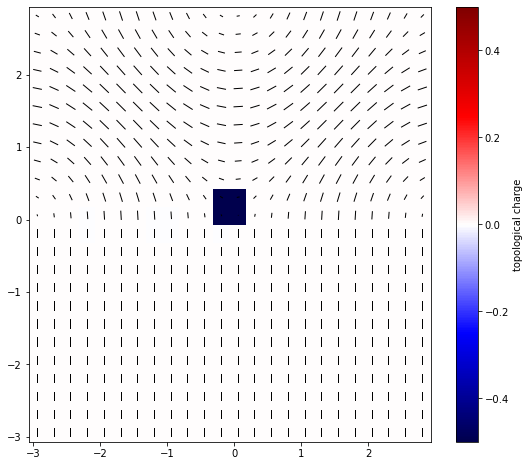

In [39]:
N = 100
R = 1

theta = np.linspace(0,2*np.pi,N,endpoint=False)
x_c = R*np.cos(theta)
y_c = R*np.sin(theta)
delta = .25
L = np.pi-.2

x_grid = np.arange(-L,L,delta)
y_grid = np.arange(-L,L,delta)
xx, yy = np.meshgrid(x_grid,y_grid)

u_lattice = np.sin(yy)
v_lattice = np.sin(xx)
u = np.copy(u_lattice)
v = np.copy(v_lattice)
v[yy<=0] = 1
u[yy<=0] = 0
phi = get_orientation_angle(u, v)
k = compute_topological_charges(phi, int_area='square', width=1, origin='lower')

fig, ax = plt.subplots(figsize=(9,8))
plt.set_cmap('seismic')
c = ax.pcolormesh(xx,yy,k,shading='auto', vmin=-.5, vmax=.5)
ax.quiver(xx, yy, u, v, headaxislength=0, headwidth=0, headlength=0, pivot='mid')
plt.colorbar(c, label='topological charge')

In [17]:
defects = localize_defects(k, x_grid=xx, y_grid=yy)
defects['x'] = 0
defects['y'] = 0
compute_defect_orientations(phi, defects, method='interpolation', x_grid=xx, y_grid=yy, min_sep=1, interpolation_radius=R)
# compute_defect_orientations(phi, defects, origin='lower')
plushalf = defects[defects['charge']==.5]
minushalf = defects[defects['charge']==-.5]

defects

c:\Users\USER\anaconda3\envs\RevDx\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=1,1 nx,ny=26,22 m=576 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


charge  x  y  x_ind  y_ind      ang1      ang2      ang3
0    -0.5  0  0     11     12 -1.570796  0.816814  2.324779

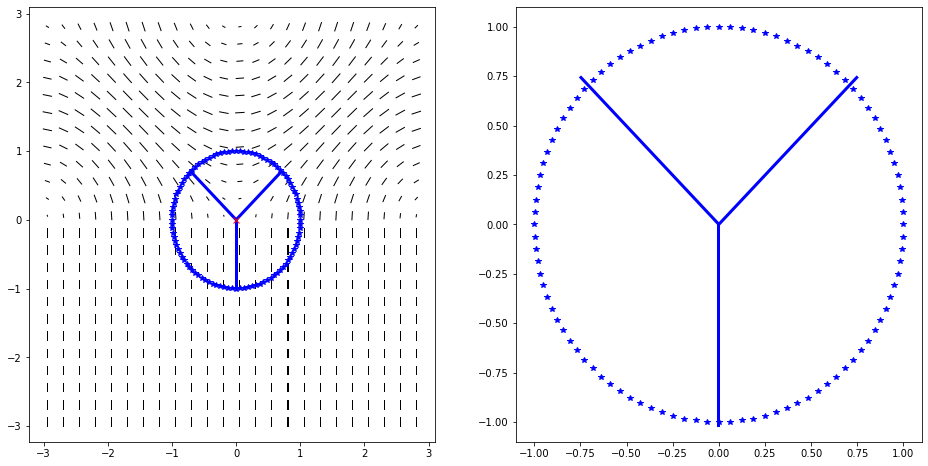

In [18]:
x0, y0 = 0,0
fig, axs = plt.subplots(1,2,figsize=(16,8))
axs[0].quiver(xx, yy, u, v, headaxislength=0, headwidth=0, headlength=0, pivot='mid')

axs[0].plot(plushalf['x'], plushalf['y'],'ro',markersize=15,label=r'+1/2 defect')
axs[0].plot(plushalf['x'], plushalf['y'],'ro',markersize=15,label=r'+1/2 defect')
axs[0].quiver(plushalf['x'], plushalf['y'], np.cos(plushalf['ang1']), np.sin(plushalf['ang1']), headaxislength=0, headwidth=0, headlength=0, color='r', scale=50)

for i in range(3):
    axs[0].quiver(minushalf['x'], minushalf['y'], np.cos(minushalf['ang'+str(i+1)]), np.sin(minushalf['ang'+str(i+1)]), headaxislength=0, headwidth=0, headlength=0, color='b', scale=6)
    axs[1].quiver(minushalf['x'], minushalf['y'], np.cos(minushalf['ang'+str(i+1)]), np.sin(minushalf['ang'+str(i+1)]), headaxislength=0, headwidth=0, headlength=0, color='b', scale=2)

axs[0].plot(x0+x_c,y0+y_c,'b*')
axs[0].plot(x0,y0,'rx')
axs[1].plot(x0+x_c,y0+y_c,'b*')

0.5


c:\Users\USER\CODES\nematics\vasco_scripts\defects.py:44: RuntimeWarning: divide by zero encountered in true_divide
  phi = np.arctan(v/u) # TO DO: catch zero exception!!


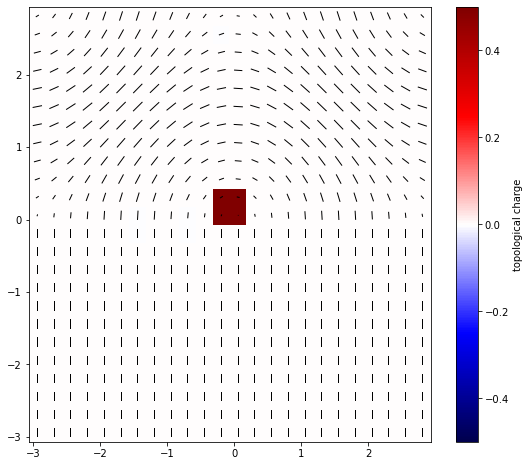

In [40]:
phi = get_orientation_angle(u, -v)
k = compute_topological_charges(phi, int_area='square', width=1, origin='lower')
print(k.max())

fig, ax = plt.subplots(figsize=(9,8))
plt.set_cmap('seismic')
c = ax.pcolormesh(xx,yy,k,shading='auto', vmin=-.5, vmax=.5)
ax.quiver(xx, yy, u, -v, headaxislength=0, headwidth=0, headlength=0, pivot='mid')
plt.colorbar(c, label='topological charge')

In [20]:
defects = localize_defects(k, x_grid=xx, y_grid=yy)
defects['x'] = 0
defects['y'] = 0
compute_defect_orientations(phi, defects, method='interpolation', x_grid=xx, y_grid=yy, min_sep=1, interpolation_radius=R)
# compute_defect_orientations(phi, defects, origin='lower')
plushalf = defects[defects['charge']==.5]
minushalf = defects[defects['charge']==-.5]

defects

c:\Users\USER\anaconda3\envs\RevDx\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=1,1 nx,ny=26,22 m=576 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


charge  x  y  x_ind  y_ind      ang1
0     0.5  0  0     11     12 -1.570796

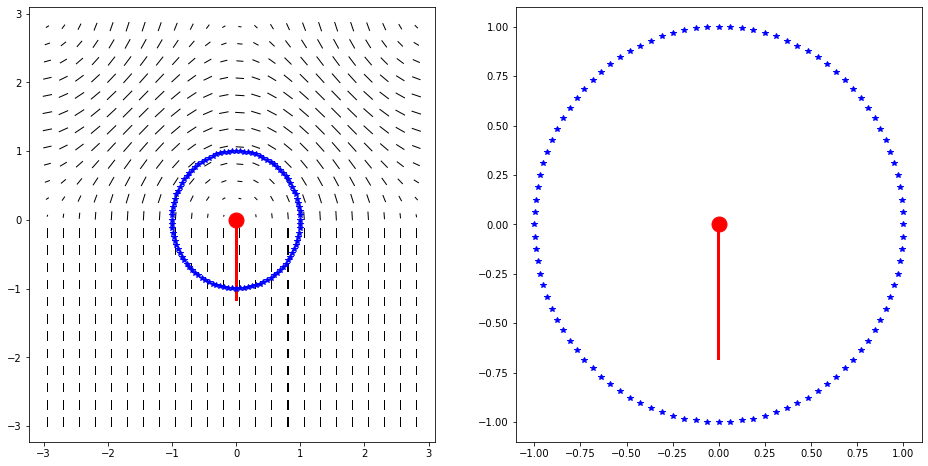

In [21]:
x0, y0 = 0,0
fig, axs = plt.subplots(1,2,figsize=(16,8))
axs[0].quiver(xx, yy, u, -v, headaxislength=0, headwidth=0, headlength=0, pivot='mid')

axs[0].plot(plushalf['x'], plushalf['y'],'ro',markersize=15,label=r'+1/2 defect')
axs[1].plot(plushalf['x'], plushalf['y'],'ro',markersize=15,label=r'+1/2 defect')
axs[0].quiver(plushalf['x'], plushalf['y'], np.cos(plushalf['ang1']), np.sin(plushalf['ang1']), headaxislength=0, headwidth=0, headlength=0, color='r', scale=5)
axs[1].quiver(plushalf['x'], plushalf['y'], np.cos(plushalf['ang1']), np.sin(plushalf['ang1']), headaxislength=0, headwidth=0, headlength=0, color='r', scale=3)

# for i in range(3):
#     axs[0].quiver(minushalf['x'], minushalf['y'], np.cos(minushalf['ang'+str(i+1)]), np.sin(minushalf['ang'+str(i+1)]), headaxislength=0, headwidth=0, headlength=0, color='b', scale=6)
#     axs[1].quiver(minushalf['x'], minushalf['y'], np.cos(minushalf['ang'+str(i+1)]), np.sin(minushalf['ang'+str(i+1)]), headaxislength=0, headwidth=0, headlength=0, color='b', scale=2)

axs[0].plot(x0+x_c,y0+y_c,'b*')
axs[0].plot(x0,y0,'rx')
axs[1].plot(x0+x_c,y0+y_c,'b*')